<a href="https://colab.research.google.com/github/frcaulia/dicv_odd_2023/blob/main/Week10_KTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Faricha Aulia ✨**

---

### **Thresholding KTP**

**1. Import the folder that exist on the drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Import library**

In [29]:
!pip install pytesseract
!sudo apt install tesseract-ocr
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ind
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 537 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 537 kB in 1s (834 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: R

In [30]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

**3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas**

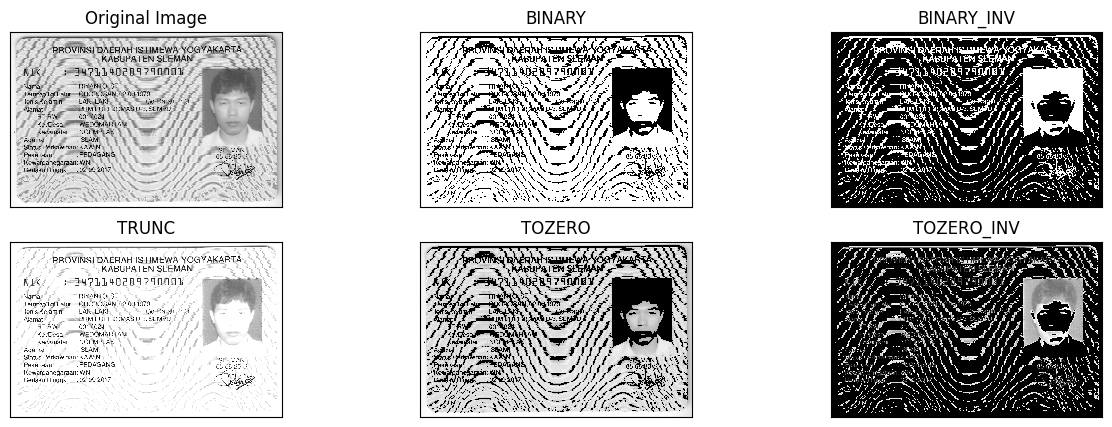

In [8]:
filename = '/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp.png'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

thresh = 170  # Nilai Threshold yang ditentukan

# 1. Threshold Binary
thresh1 = np.where(img > thresh, 255, 0)

# 2. Threshold Binary Inverse
thresh2 = 255 - thresh1

# 3. Threshold Truncate
thresh3 = np.where(img > thresh, thresh, img)

# 4. Threshold Tozero
thresh4 = np.where(img <= thresh, 0, img)

# 5. Threshold Tozero Inverse
thresh5 = np.where(img > thresh, 0, img)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

**4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s**

167


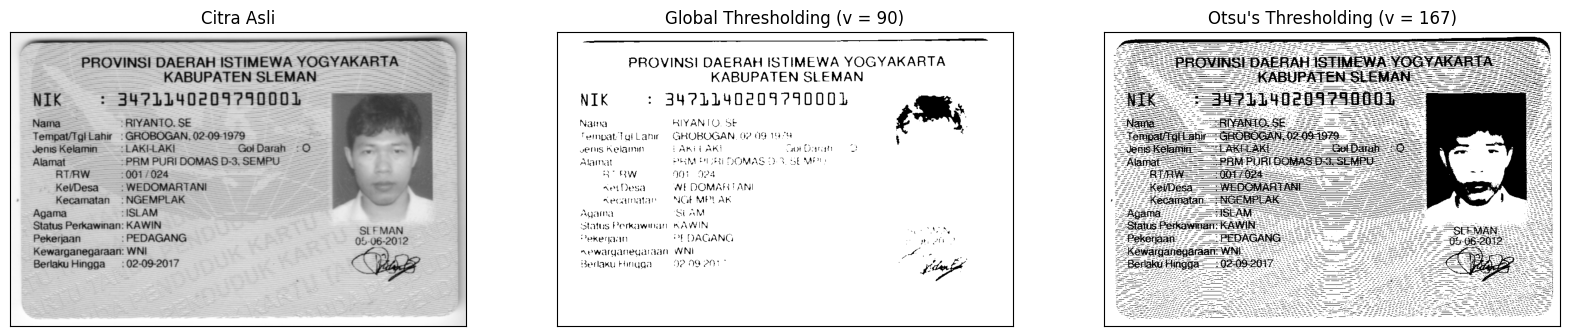

In [12]:
ktp = '/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp.png'
img = cv2.imread(ktp, 0)
blur = cv2.GaussianBlur(img, (5, 5), 0)

def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0 / pixel_number
    his, bins = np.histogram(gray, np.arange(0, 257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)

    for t in bins[1:-1]:
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        mub = np.sum(intensity_arr[:t] * his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:] * his[t:]) / float(pcf)
        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value

    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = "Otsu's Thresholding (v = " + str(otsu_thresh) + ")"
ret, th1 = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]

plt.figure(figsize=(20, 15))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

**5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.Petunjuk:**

a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

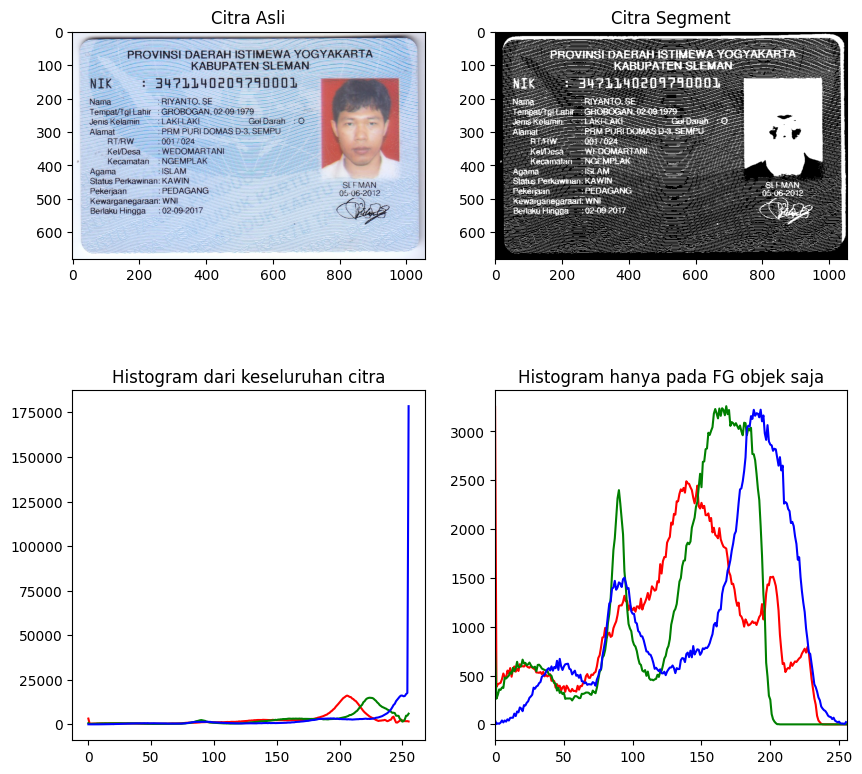

In [13]:
image = '/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp.png'
img = cv2.imread(image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret3, mask = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Citra Asli')

plt.subplot(2, 2, 2)
plt.imshow(mask, 'gray')
plt.title('Citra Segment')

color = ('r', 'g', 'b')
for i, col in enumerate(color):
    hist0 = cv2.calcHist([img], [i], None, [256], [0, 256])

    plt.subplot(2, 2, 3)
    plt.plot(hist0, color=col)
    plt.title('Histogram dari keseluruhan citra')

    hist1 = cv2.calcHist([img], [i], mask, [256], [0, 256])

    plt.subplot(2, 2, 4)
    plt.plot(hist1, color=col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0, 256])

plt.show()

**6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)**

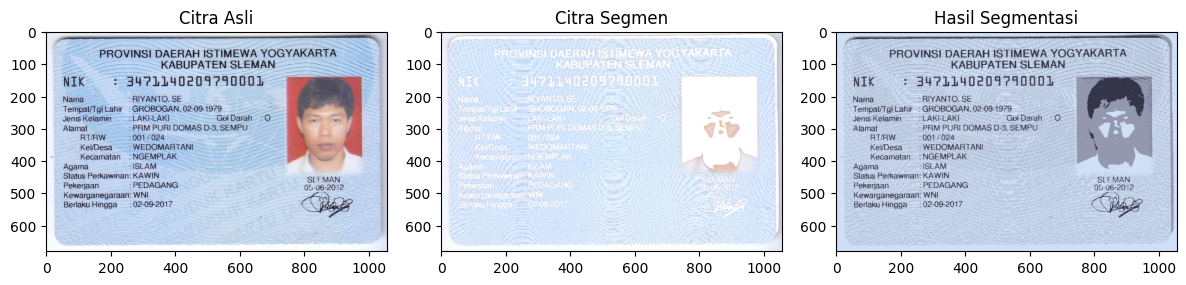

In [16]:
ktp_img = '/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp.png'
img = cv2.imread(ktp_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Reshape array ke bentuk 2D
pixel_values = img.reshape(-1, 3)

# Convert to float
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Konversi titik centroid kedalam integer
centers = np.uint8(centers)

# Flattening label array
labels = labels.flatten()

# Konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]

# Reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)

masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize=(12, 9))

# Subplot baris pertama
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Citra Asli')

# Subplot baris kedua
plt.subplot(1, 3, 2)
plt.imshow(masked_image0)
plt.title('Citra Segmen')

# Subplot baris ketiga
plt.subplot(1, 3, 3)
plt.imshow(segmented_image)
plt.title('Hasil Segmentasi')

plt.tight_layout()
plt.show()

### **Convert KTP to text**

**1. Deteksi teks**

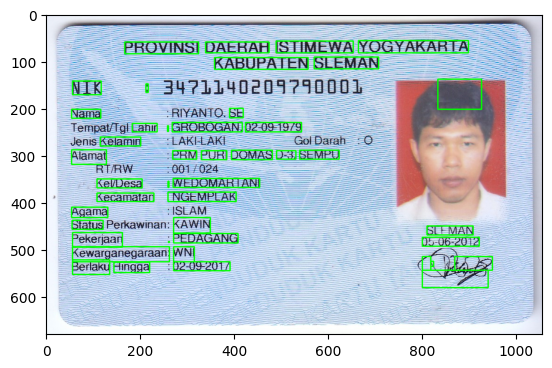

In [40]:
# (1) Read the image
img = cv2.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp.png')

# (2) Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# (3) Thresholding
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

# (4) Detect text using Tesseract and get the bounding boxes
d = pytesseract.image_to_data(threshed, output_type=Output.DICT)

# (5) Filter out text with confidence level above 60
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# (6) Display the image with bounding boxes
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

**2. Konversi ke teks**

In [41]:
# (7) Get recognized text
text = pytesseract.image_to_string(threshed, lang="ind")
print(text)

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



### **Implement Thresholding to read text in KTP**


In [32]:
import cv2
import pytesseract
from PIL import Image

# (1) Read the image
img = cv2.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp.png')

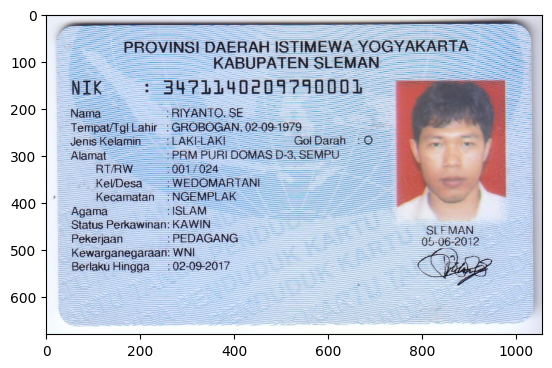

In [33]:
real_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(real_img)

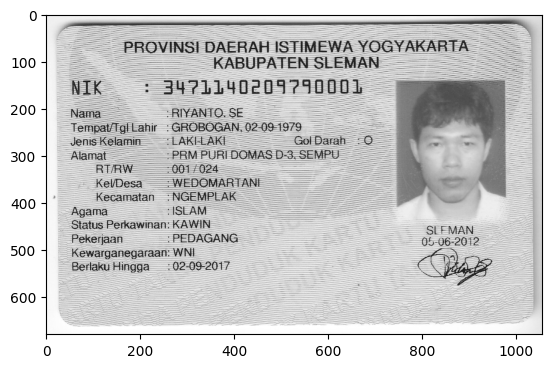

In [34]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [37]:
# (2) Thresholding
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

# (3) Detect text using Tesseract
result = pytesseract.image_to_string(Image.fromarray(threshed), lang="ind")

# (4) Normalize the text
for word in result.split("\n"):
    if "_" in word:
        word = word.replace("-", ":")
    # Normalize NIK
    if "NIK" in word:
        nik_chars = word.split()
        for i in range(len(nik_chars)):
            if "D" in nik_chars[i]:
                nik_chars[i] = nik_chars[i].replace("D", "0")
            if "?" in nik_chars[i]:
                nik_chars[i] = nik_chars[i].replace("?", "7")
        word = " ".join(nik_chars)
    print(word)

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 

